In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error

In [2]:
bike_sharing = pd.read_csv("bike_sharing_data.csv")

In [3]:
bike_sharing

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [5]:
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
bike_sharing.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [7]:
import datetime as dt
bike_sharing['dteday'] = pd.to_datetime(bike_sharing['dteday'])

In [8]:
bike_sharing.dtypes


instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object

In [10]:
bike_sharing['season'].unique()

array([1, 2, 3, 4])

In [33]:
bike_sharing['season'].dtype

dtype('int64')

In [38]:
#bike_sharing['season'].replace(1,'Spring',inplace=True)

In [40]:
#bike_sharing['season'].dtype

In [41]:
bike_sharing['season'].replace({1:'Spring', 2:'Summer', 3:'Autumn', 4:'Winter'}, inplace=True)

In [42]:
bike_sharing['season'].dtype

dtype('O')

In [43]:
bike_sharing['season'].value_counts()

Autumn    188
Summer    184
Spring    180
Winter    178
Name: season, dtype: int64

In [12]:
bike_sharing['yr'].unique()

array([0, 1])

In [44]:
bike_sharing['yr'].replace({0:'2018', 1:'2019'}, inplace=True)

In [45]:
bike_sharing['mnth'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [46]:
bike_sharing['mnth'].replace({1:'JAN', 2:'FEB', 3:'MAR', 4:'APR', 5:'MAY', 6:'JUN', 7:'JUL', 8:'AUG', 9:'SEP', 10:'OCT', 11:'NOV', 12:'DEC'}, inplace=True)

In [47]:
bike_sharing['mnth'].value_counts()

JUL    62
MAR    62
AUG    62
JAN    62
DEC    62
MAY    62
OCT    62
NOV    60
JUN    60
SEP    60
APR    60
FEB    56
Name: mnth, dtype: int64

In [48]:
bike_sharing['holiday'].unique()

array([0, 1])

In [49]:
bike_sharing['holiday'].unique()

array([0, 1])

In [50]:
bike_sharing['holiday'].replace({0:'hd0',1:'hd1'},inplace=True)

In [51]:
bike_sharing['holiday'].value_counts()

hd0    709
hd1     21
Name: holiday, dtype: int64

In [52]:
bike_sharing['weekday'].unique()

array([6, 0, 1, 2, 3, 4, 5])

In [53]:
bike_sharing['weekday'].replace({0:'Tue', 1:'Wed', 2:'Thu', 3:'Fri', 4:'Sat', 5:'Sun', 6:'Mon'},inplace=True)

In [54]:
bike_sharing['workingday'].unique()

array([0, 1])

In [55]:
bike_sharing['workingday'].replace({0:'wrd0',1:'wrd1'},inplace=True)

In [56]:
bike_sharing['weathersit'].unique()

array([2, 1, 3])

In [57]:
bike_sharing['weathersit'].replace({1:'A',2:'B',3:'C'},inplace=True)


In [58]:
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    object        
 3   yr          730 non-null    object        
 4   mnth        730 non-null    object        
 5   holiday     730 non-null    object        
 6   weekday     730 non-null    object        
 7   workingday  730 non-null    object        
 8   weathersit  730 non-null    object        
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

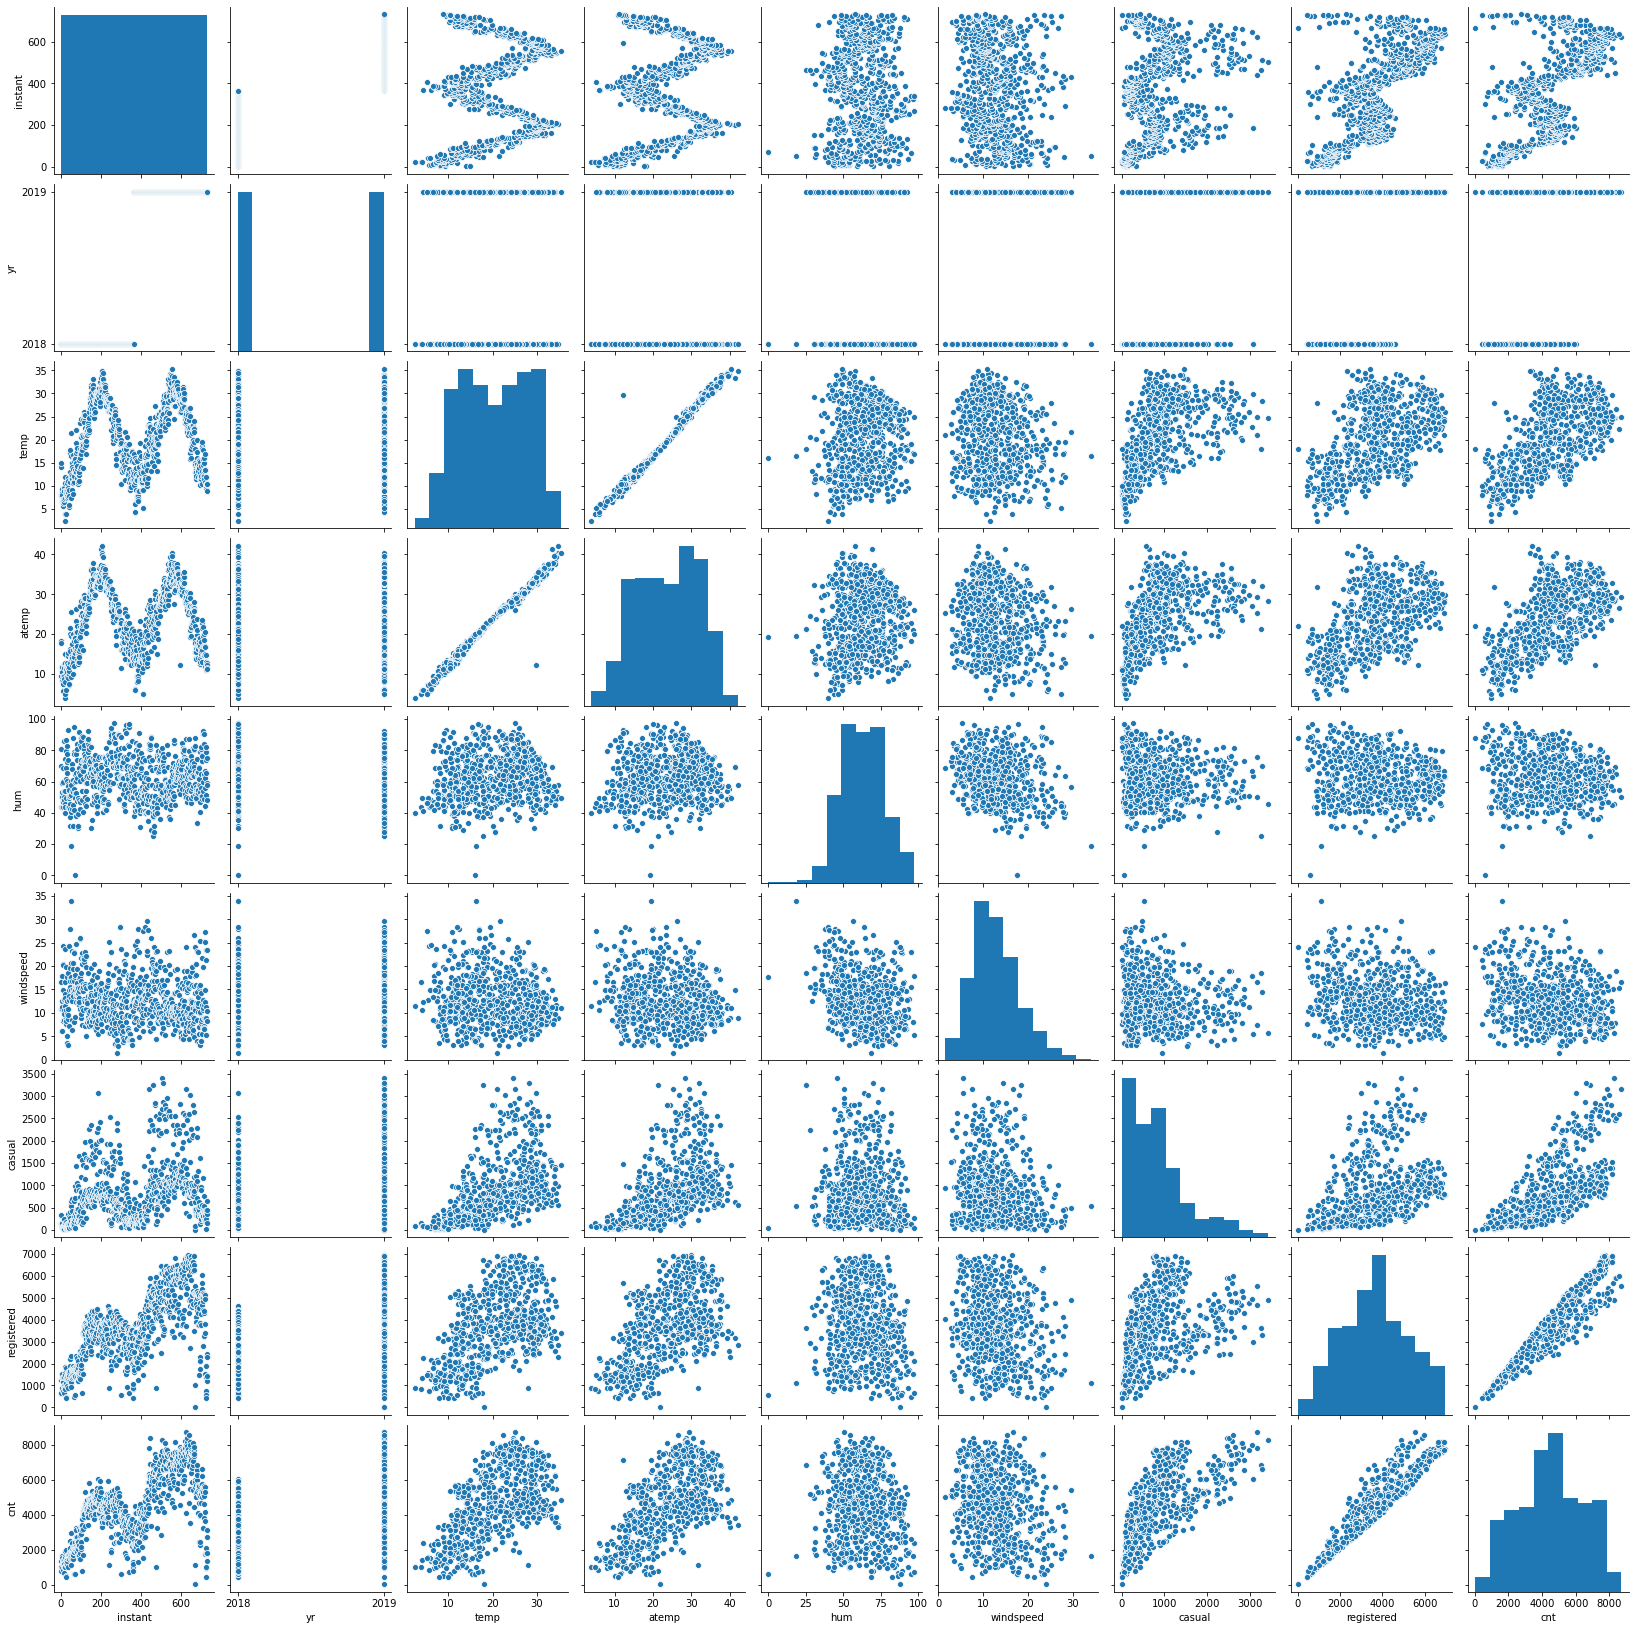

In [60]:
sns.pairplot(bike_sharing)

In [61]:
df_numeric = bike_sharing.select_dtypes(include=['int64','float64'])

In [66]:
df_numeric = df_numeric.drop(['instant'],axis=1)

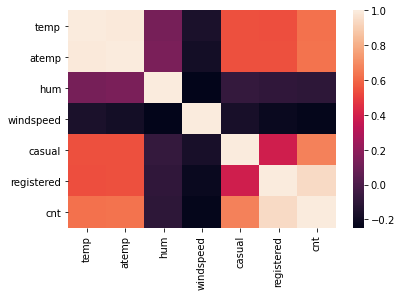

In [75]:
sns.heatmap(df_numeric.corr())

In [68]:
cols = list(df_numeric.columns)

In [74]:
cols

['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

In [76]:
bike_sharing.dtypes

instant                int64
dteday        datetime64[ns]
season                object
yr                    object
mnth                  object
holiday               object
weekday               object
workingday            object
weathersit            object
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object

In [77]:
df_categorical = bike_sharing.select_dtypes(['object'])

In [78]:
df_categorical


,season,yr,mnth,holiday,weekday,workingday,weathersit
0,Spring,2018,JAN,hd0,Mon,wrd0,B
1,Spring,2018,JAN,hd0,Tue,wrd0,B
2,Spring,2018,JAN,hd0,Wed,wrd1,A
3,Spring,2018,JAN,hd0,Thu,wrd1,A
4,Spring,2018,JAN,hd0,Fri,wrd1,A
...,...,...,...,...,...,...,...
725,Spring,2019,DEC,hd0,Sat,wrd1,B
726,Spring,2019,DEC,hd0,Sun,wrd1,B
727,Spring,2019,DEC,hd0,Mon,wrd0,B
728,Spring,2019,DEC,hd0,Tue,wrd0,A


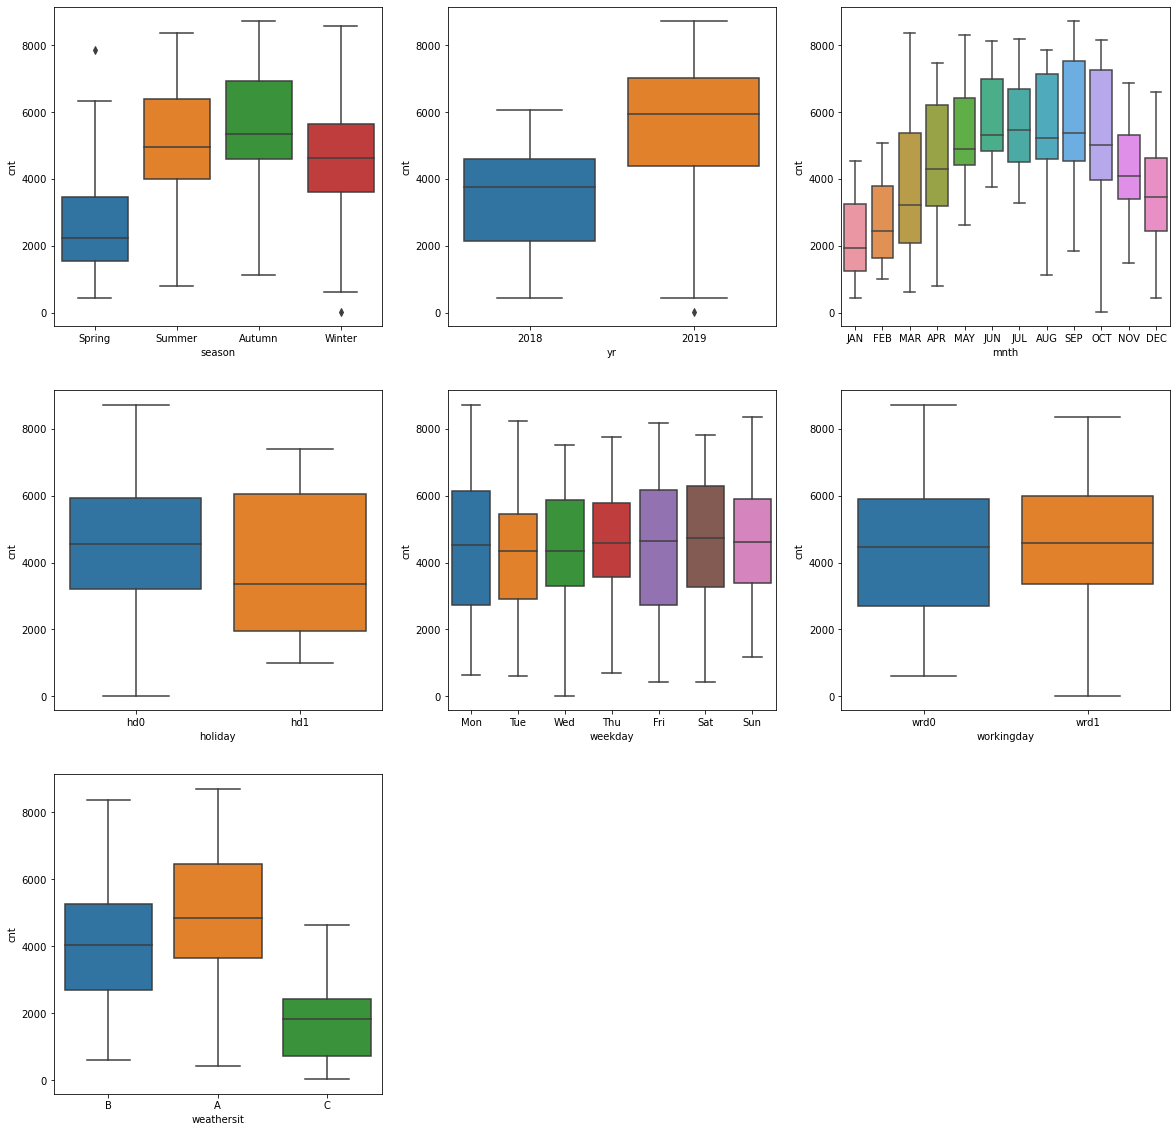

In [79]:
plt.figure(figsize=(20,20))

plt.subplot(3,3,1)
sns.boxplot(x='season',y='cnt',data=bike_sharing)

plt.subplot(3,3,2)
sns.boxplot(x='yr',y='cnt',data=bike_sharing)

plt.subplot(3,3,3)
sns.boxplot(x='mnth',y='cnt',data=bike_sharing)

plt.subplot(3,3,4)
sns.boxplot(x='holiday',y='cnt',data=bike_sharing)

plt.subplot(3,3,5)
sns.boxplot(x='weekday',y='cnt',data=bike_sharing)

plt.subplot(3,3,6)
sns.boxplot(x='workingday',y='cnt',data=bike_sharing)

plt.subplot(3,3,7)
sns.boxplot(x='weathersit',y='cnt',data=bike_sharing)

plt.show()




In [81]:
bike_sharing_dm = pd.get_dummies(bike_sharing, drop_first=True, columns=['season','yr','mnth','holiday','weekday','workingday','weathersit'])

In [82]:
bike_sharing_dm

,instant,dteday,temp,atemp,hum,windspeed,casual,registered,cnt,season_Spring,...,holiday_hd1,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_wrd1,weathersit_B,weathersit_C
0,1,2018-01-01,14.110847,18.18125,80.5833,10.749882,331,654,985,1,...,0,1,0,0,0,0,0,0,1,0
1,2,2018-02-01,14.902598,17.68695,69.6087,16.652113,131,670,801,1,...,0,0,0,0,0,1,0,0,1,0
2,3,2018-03-01,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,...,0,0,0,0,0,0,1,1,0,0
3,4,2018-04-01,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1,...,0,0,0,0,1,0,0,1,0,0
4,5,2018-05-01,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,2019-12-27,10.420847,11.33210,65.2917,23.458911,247,1867,2114,1,...,0,0,1,0,0,0,0,1,1,0
726,727,2019-12-28,10.386653,12.75230,59.0000,10.416557,644,2451,3095,1,...,0,0,0,1,0,0,0,1,1,0
727,728,2019-12-29,10.386653,12.12000,75.2917,8.333661,159,1182,1341,1,...,0,1,0,0,0,0,0,0,1,0
728,729,2019-12-30,10.489153,11.58500,48.3333,23.500518,364,1432,1796,1,...,0,0,0,0,0,1,0,0,0,0


In [84]:
bike_sharing_dm = bike_sharing_dm.drop(['instant','dteday','atemp'],axis=1)

In [85]:
bike_sharing_dm.dtypes


temp               float64
hum                float64
windspeed          float64
casual               int64
registered           int64
cnt                  int64
season_Spring        uint8
season_Summer        uint8
season_Winter        uint8
yr_2019              uint8
mnth_AUG             uint8
mnth_DEC             uint8
mnth_FEB             uint8
mnth_JAN             uint8
mnth_JUL             uint8
mnth_JUN             uint8
mnth_MAR             uint8
mnth_MAY             uint8
mnth_NOV             uint8
mnth_OCT             uint8
mnth_SEP             uint8
holiday_hd1          uint8
weekday_Mon          uint8
weekday_Sat          uint8
weekday_Sun          uint8
weekday_Thu          uint8
weekday_Tue          uint8
weekday_Wed          uint8
workingday_wrd1      uint8
weathersit_B         uint8
weathersit_C         uint8
dtype: object

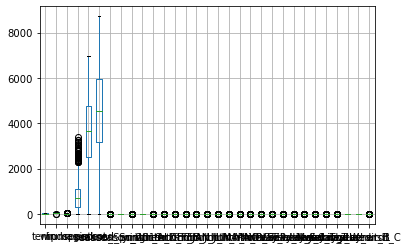

In [86]:
bike_sharing_dm.boxplot()

In [87]:
bike_sharing_dm.columns

Index(['temp', 'hum', 'windspeed', 'casual', 'registered', 'cnt',
       'season_Spring', 'season_Summer', 'season_Winter', 'yr_2019',
       'mnth_AUG', 'mnth_DEC', 'mnth_FEB', 'mnth_JAN', 'mnth_JUL', 'mnth_JUN',
       'mnth_MAR', 'mnth_MAY', 'mnth_NOV', 'mnth_OCT', 'mnth_SEP',
       'holiday_hd1', 'weekday_Mon', 'weekday_Sat', 'weekday_Sun',
       'weekday_Thu', 'weekday_Tue', 'weekday_Wed', 'workingday_wrd1',
       'weathersit_B', 'weathersit_C'],
      dtype='object')

In [88]:
X1 = bike_sharing_dm.drop(['casual', 'registered', 'cnt'], axis=1)

In [89]:
y = bike_sharing_dm['cnt']

In [91]:
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size = 0.3, random_state = 123)

In [92]:
scaler = MinMaxScaler()
X1_train_mnmx = scaler.fit_transform(X1_train)
X1_test_mnmx = scaler.fit_transform(X1_test)

In [93]:
X1_train_mnmx

array([[0.36659088, 0.6311054 , 0.13101289, ..., 1.        , 0.        ,
        0.        ],
       [0.20564371, 0.75192802, 0.53205873, ..., 0.        , 0.        ,
        1.        ],
       [0.51196369, 0.83590437, 0.33420587, ..., 1.        , 1.        ,
        0.        ],
       ...,
       [0.30428843, 0.45586941, 0.80214499, ..., 1.        , 0.        ,
        0.        ],
       [0.38735878, 0.71208226, 0.32217557, ..., 0.        , 0.        ,
        0.        ],
       [0.78920961, 0.75321337, 0.33684798, ..., 0.        , 0.        ,
        0.        ]])

In [94]:
parameters = {'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8],
                  'subsample'    : [0.9, 0.5, 0.2, 0.1],
                  'n_estimators' : [50,100,500],
                'max_depth'      : [2, 3, 4, 5, 6],
                  'min_samples_split'  : [2, 3, 4, 5, 6, 7, 8],
               'warm_start': [True],
              'random_state' : [123]
              }

In [95]:
GBR = GradientBoostingRegressor()

In [96]:
import time
start = time.time()
grid_GBR = GridSearchCV(estimator=GBR, param_grid = parameters, cv = 3, n_jobs=-1)
grid_GBR.fit(X1_train_mnmx, y_train)
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_GBR.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_GBR.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_GBR.best_params_)
end = time.time()
print("\n Execution time:\n", (end-start))

 Results from Grid Search 

 The best estimator across ALL searched params:
 GradientBoostingRegressor(max_depth=5, random_state=123, subsample=0.2,
                          warm_start=True)

 The best score across ALL searched params:
 0.8921376352763838

 The best parameters across ALL searched params:
 {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 100, 'random_state': 123, 'subsample': 0.2, 'warm_start': True}

 Execution time:
 967.5605230331421


In [97]:
tuned_parameters = {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 100, 'random_state': 123, 'subsample': 0.2, 'warm_start': True}

In [99]:
from sklearn.metrics import r2_score
tuned_model = GradientBoostingRegressor(**tuned_parameters)
tuned_gbm=tuned_model.fit(X1_train_mnmx, y_train)
mse = mean_squared_error(y_test, tuned_gbm.predict(X1_test_mnmx))
print("\n The mean squared error (MSE) on test set: {:.4f} \n".format(mse))
print("\n R2 score on train: \n",r2_score(y_train, tuned_gbm.predict(X1_train_mnmx)))
print("\n R2 score on test: \n",r2_score(y_test, tuned_gbm.predict(X1_test_mnmx)))



 The mean squared error (MSE) on test set: 553980.5156 


 R2 score on train: 
 0.9719361243095768

 R2 score on test: 
 0.8227054460954087


# Model Prection

In [100]:
y_pred = tuned_gbm.predict(X1_test_mnmx)

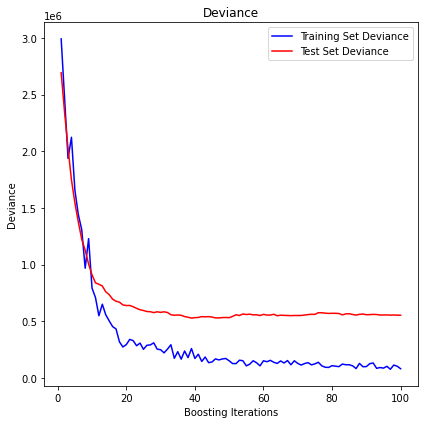

In [101]:
test_score = np.zeros((tuned_parameters['n_estimators'],), dtype=np.float64)
for i, y_pred in enumerate(tuned_gbm.staged_predict(X1_test_mnmx)):
    test_score[i] = tuned_gbm.loss_(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title('Deviance')
plt.plot(np.arange(tuned_parameters['n_estimators']) + 1, tuned_gbm.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(tuned_parameters['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
fig.tight_layout()
plt.show()

# Importance of features

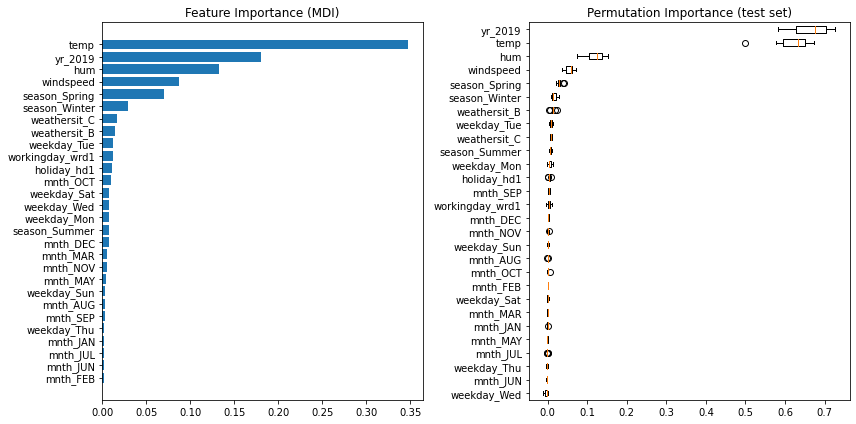

In [102]:
feature_importance = tuned_gbm.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(X1.columns)[sorted_idx])
plt.title('Feature Importance (MDI)')

result = permutation_importance(tuned_gbm, X1_test_mnmx, y_test, n_repeats=10,
                                random_state=123, n_jobs=2)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(result.importances[sorted_idx].T,
            vert=False, labels=np.array(X1.columns)[sorted_idx])
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

<b> ` Observations: `</b>
- The Gradient boosting regression algorithm shows that the temperature, year, humidity, wind speed and season are most important features. Although, Permutation importance shows different orders of top two most important features.